In [2]:
import tensorflow as tf
import warnings 
import matplotlib.pyplot as plt 
warnings.filterwarnings("ignore")

%matplotlib inline

## Fashion MNIST Dataset:

In [3]:
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
# plt.imshow(train_images[0], cmap = "gray")
print(train_labels[5]) # lable is '9'
print(train_images[5]) # numpy array / grayscale pixels representation for 'ankle shoe'

2
[[  0   0   0   0   1   0   0   0   0  22  88 188 172 132 125 141 199 143
    9   0   0   0   1   0   0   0   0   0]
 [  0   0   0   1   0   0  20 131 199 206 196 202 242 255 255 250 222 197
  206 188 126  17   0   0   0   0   0   0]
 [  0   0   0   1   0  35 214 191 183 178 175 168 150 162 159 152 158 179
  183 189 195 185  82   0   0   0   0   0]
 [  0   0   0   0   0 170 190 172 177 176 171 169 162 155 148 154 169 174
  175 175 177 183 188  12   0   0   0   0]
 [  0   0   0   0  25 194 180 178 174 184 187 189 187 184 181 189 200 197
  193 190 178 175 194  90   0   0   0   0]
 [  0   0   0   0  42 218 191 197 208 204 211 209 210 212 211 214 215 213
  214 211 211 191 200 158   0   0   0   0]
 [  0   0   0   0  88 221 215 217 219 211 185 150 118 107  99  88  83  90
  135 212 203 207 219 169   0   0   0   0]
 [  0   0   0   0   0  27 118 162  40   0   0   0  10  19  28  39  47  36
    0   0 203 230 220 203   0   0   0   0]
 [  0   0   0   0 138 136  71  69  54 216 217 203 184 168 163 

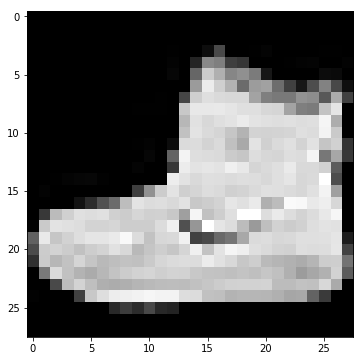

In [6]:
plt.figure(figsize = (12, 6))
plt.imshow(train_images[0], cmap = 'gray')

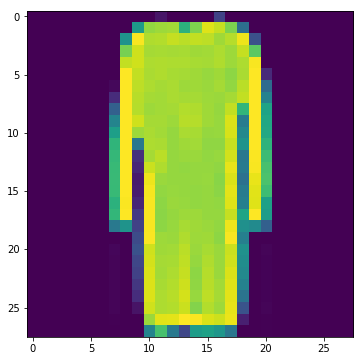

In [7]:
plt.figure(figsize = (12,6))
plt.imshow(train_images[25])

## Data Normalization:

In [8]:
train_images = train_images / 255.0
train_labels = train_labels / 255.0

## Building Keras Model:

In [44]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units = 512, activation = tf.nn.relu),
                                  #tf.keras.layers.Dense(units = 512, activation = tf.nn.relu),
                                  #tf.keras.layers.Dense(units = 64, activation = tf.nn.relu),
                                  #tf.keras.layers.Dense(units = 32, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])

## Compiling the Model:

In [45]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ["accuracy"])

## Fitting the Model:

In [52]:
history = model.fit(train_images, train_labels, epochs = 5, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 183us/sample - loss: 0.0213 - acc: 0.9935 - val_loss: 0.0253 - val_acc: 0.9916
Epoch 2/5
48000/48000 [==============================] - 9s 180us/sample - loss: 0.0170 - acc: 0.9940 - val_loss: 0.0261 - val_acc: 0.9914
Epoch 3/5
48000/48000 [==============================] - 9s 181us/sample - loss: 0.0113 - acc: 0.9961 - val_loss: 0.0373 - val_acc: 0.9871
Epoch 4/5
48000/48000 [==============================] - 9s 181us/sample - loss: 0.0100 - acc: 0.9966 - val_loss: 0.0321 - val_acc: 0.9898
Epoch 5/5
48000/48000 [==============================] - 9s 183us/sample - loss: 0.0104 - acc: 0.9964 - val_loss: 0.0423 - val_acc: 0.9870


## Model Evaluation:

In [59]:
model.evaluate(test_images, test_labels)
classfications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

10000/10000 [==============================] - 1s 76us/sample - loss: 0.0942 - acc: 0.9774
[8.9753066e-11 6.9221556e-10 3.9782072e-10 1.3425953e-05 1.3937996e-14
 5.0639803e-10 2.1863733e-14 9.9998653e-01 3.9474690e-09 6.8810357e-09]
7


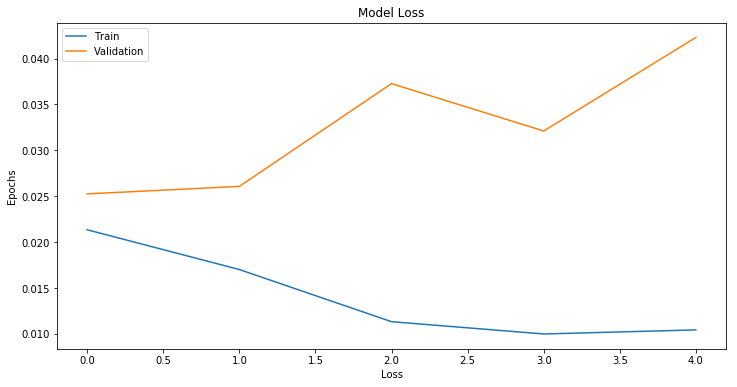

In [60]:
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper_right')

## Second Model (Larger Hidden Units):

In [29]:
import tensorflow as tf
print(tf.__version__)

# built the model for larger number of hidden units
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(units = 512, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(units = 256, activation = tf.nn.relu),
                                  tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)])


# compile the model
model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

# fit the model
model.fit(train_images, train_labels, epochs = 5)

# evaluate the model 
model.evaluate(test_images, test_labels) # this will evaluate our model by measuring the score and accuracy

# make classifications
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0016 - acc: 0.0999
Epoch 2/5
60000/60000 [==============================] - 12s 207us/sample - loss: 6.2381e-08 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 13s 211us/sample - loss: 1.8449e-08 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 13s 212us/sample - loss: 5.3861e-09 - acc: 0.1000
Epoch 5/5
10000/10000 [==============================] - 1s 92us/sample - loss: 23877.3538 - acc: 0.1000
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
9


## Third Model (Removing the Flatten Layer):

In [39]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(training_images, training_labels, epochs=5, validation_split = 0.2)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

1.14.0
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 186us/sample - loss: 0.2238 - acc: 0.9347 - val_loss: 0.1226 - val_acc: 0.9638
Epoch 2/5
48000/48000 [==============================] - 9s 181us/sample - loss: 0.0888 - acc: 0.9729 - val_loss: 0.1013 - val_acc: 0.9685
Epoch 3/5
48000/48000 [==============================] - 9s 193us/sample - loss: 0.0562 - acc: 0.9831 - val_loss: 0.0864 - val_acc: 0.9742
Epoch 4/5
48000/48000 [==============================] - 10s 202us/sample - loss: 0.0398 - acc: 0.9875 - val_loss: 0.0797 - val_acc: 0.9762
Epoch 5/5
10000/10000 [==============================] - 1s 79us/sample - loss: 0.0790 - acc: 0.9768
[8.9753066e-11 6.9221556e-10 3.9782072e-10 1.3425953e-05 1.3937996e-14
 5.0639803e-10 2.1863733e-14 9.9998653e-01 3.9474690e-09 6.8810357e-09]
7


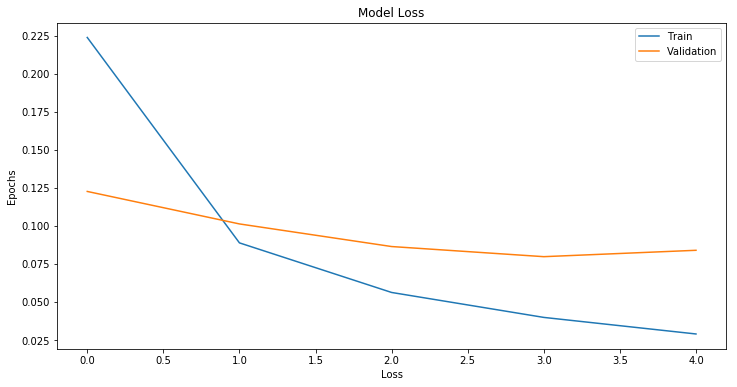

In [40]:
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['Train', 'Validation'], loc = 'upper_right')

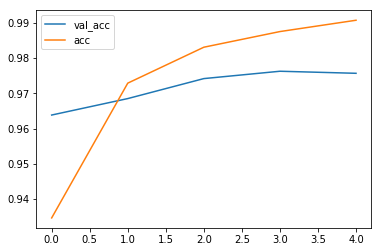

In [43]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.legend(['val_acc', 'acc'], loc = 'upper_left')